# **CRYPTOCURRENCY PRICE PREDICTION WITH PYTHON**

Mount Google Drive to access files in the Colab environment.

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')




Mounted at /content/drive


Since we decided to work with only 6 top cryptocurries, we had to read individual cryptocurrency datasets (CSV files) from Google Drive and combine them into a single DataFrame named data.

In [92]:

# Read the individual datasets
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_XRP.csv')
data2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_USDCoin.csv')
data3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_Tether.csv')
data4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_Solana.csv')
data5 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_Ethereum.csv')
data6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/coin_Bitcoin.csv')


In [93]:
# Combine the datasets into one DataFrame
data = pd.concat([data1, data2, data3, data4, data5, data6], ignore_index=True)

# Display the combined DataFrame
data


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...,...
11811,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
11812,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
11813,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
11814,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11816 entries, 0 to 11815
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        11816 non-null  int64  
 1   Name       11816 non-null  object 
 2   Symbol     11816 non-null  object 
 3   Date       11816 non-null  object 
 4   High       11816 non-null  float64
 5   Low        11816 non-null  float64
 6   Open       11816 non-null  float64
 7   Close      11816 non-null  float64
 8   Volume     11816 non-null  float64
 9   Marketcap  11816 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 923.2+ KB


Here, we are printing out basic statistics, ie. mean, count, std, min, etc, of the numerical columns in the dataframe

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

#statistics of the numerical columns
print("Basic Statistics:\n", data.describe())

Basic Statistics:
                 SNo          High           Low          Open         Close  \
count  11816.000000  11816.000000  11816.000000  11816.000000  11816.000000   
mean    1209.139218   1818.491387   1709.347149   1766.745322   1769.757493   
std      802.358409   6567.190778   6140.613174   6370.347750   6377.042856   
min        1.000000      0.003082      0.002802      0.002809      0.002810   
25%      501.000000      0.955702      0.877953      0.923669      0.924274   
50%     1114.000000      1.019210      1.000420      1.007189      1.007451   
75%     1852.250000    384.602399    367.221047    375.562004    375.625496   
max     2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  1.181600e+04  1.181600e+04  
mean   8.224889e+09  4.215210e+10  
std    1.993426e+10  1.203580e+11  
min    0.000000e+00  0.000000e+00  
25%    1.163610e+07  4.230587e+08  
50%    4.492723e+08  6.411140e+09  
75%    5.513650e+

The purpose of the code below is to visualize the distribution of the 'Close' prices in the 'data' DataFrame. This can be helpful for understanding the overall shape of the distribution and identifying any outliers. For example, if the distribution is skewed to the right, this means that there are more data points on the right side of the plot than on the left side. This could indicate that there are a few very high values of the 'Close' price.

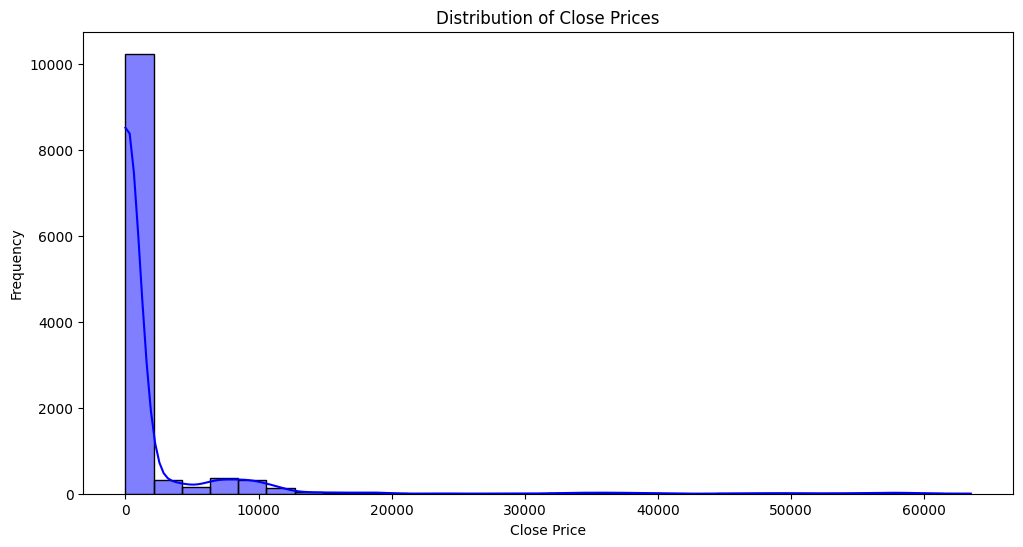

In [96]:

# Distribution of the 'Close' prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

This code is creating a time series plot of the 'Close' prices in the 'data' DataFrame. A time series plot is a type of line chart that shows how a value changes over time. In this case, the time series plot shows how the 'Close' price of the cryptocurrency has changed over time.

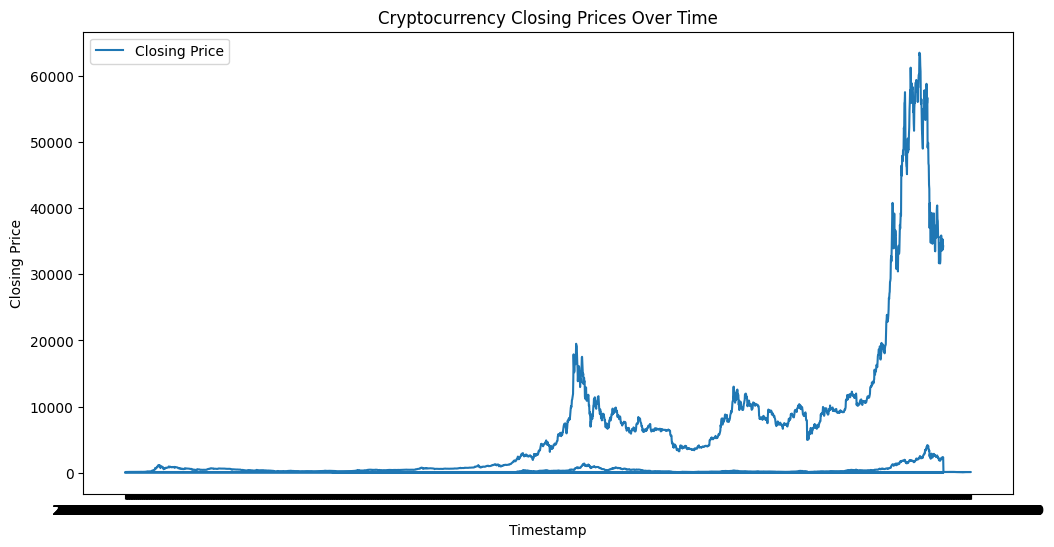

In [97]:
# Plotting time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Cryptocurrency Closing Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Here is another time series plot of the 'Volume' and 'data' dataset,how the volume chabges over time

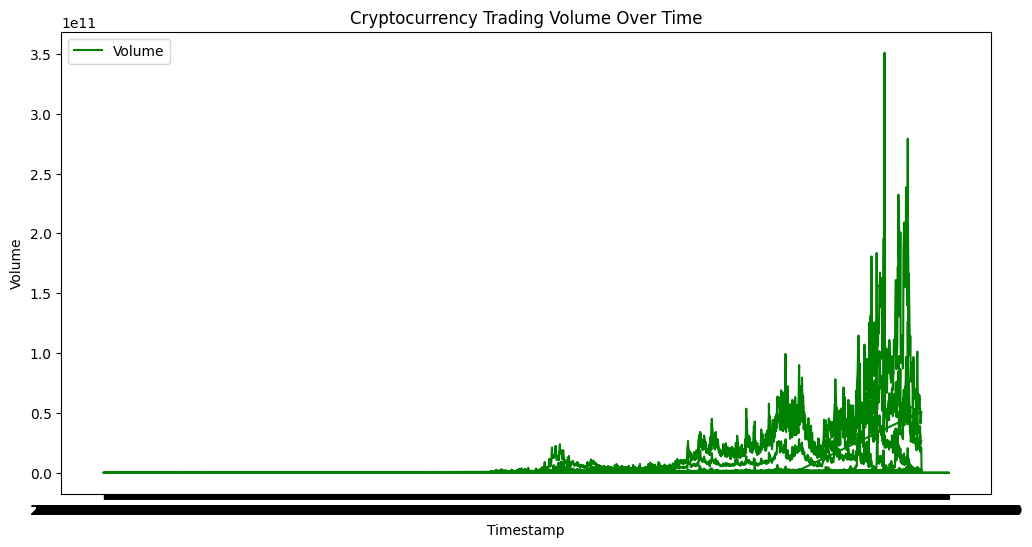

In [98]:
#Analyze the relationship between trading volume and price changes.
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='green')
plt.title('Cryptocurrency Trading Volume Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.show()


The code is creating a visual representation of the relationships between different variables in a dataset. It does this by calculating the correlation coefficients between each pair of variables and then displaying those coefficients in a color-coded heatmap. This allows you to quickly see which variables are strongly correlated with each other.

<ipython-input-99-577e4eaf10d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


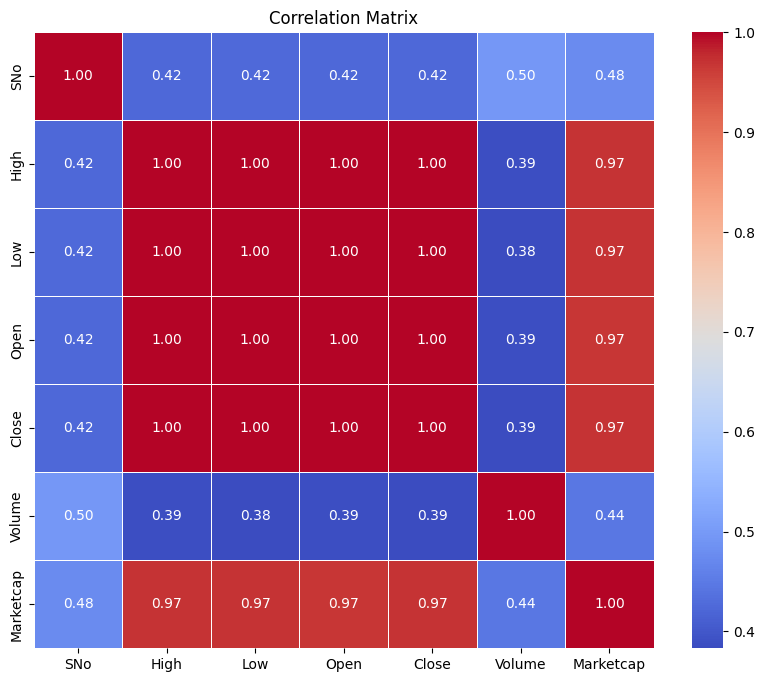

In [99]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


After EDA, we started cleaning and preparing the data for further analysis. It is converting the timestamps to pandas datetime format, checking for data type consistency, sorting the timestamps, and resetting the index. This will ensure that the data is ready for use in subsequent analysis tasks.

In [100]:
# Convert 'timestamp' to pandas datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Confirm the data types and check for any inconsistencies
print("Data Types:\n", data.dtypes)

# Ensure that the timestamps are sorted and consistent across all datasets
data = data.sort_values(by='Date').reset_index(drop=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", data.head())

Data Types:
 SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object
Cleaned DataFrame:
    SNo     Name Symbol                Date        High         Low  \
0    1  Bitcoin    BTC 2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC 2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4 

In [101]:
pip install ta


Below, we started adding technical indicators and a lag feature to the `combined_data` DataFrame. Technical indicators are mathematical calculations that help analyze price movements and trends. A lag feature is simply a copy of a feature from a previous time step.

The code adds the following technical indicators:

- **10-day Simple Moving Average (SMA_10)**: This is the average of the closing prices over the past 10 days. It can help to smooth out short-term fluctuations in the price.

- **50-day Simple Moving Average (SMA_50)**: This is the average of the closing prices over the past 50 days. It can help to identify longer-term trends in the price.

- **Relative Strength Index (RSI)**: This measures the speed and magnitude of price movements. It can be used to identify overbought or oversold conditions in the market.

The code also adds a lag feature called `Close_Lag_1`. This is simply a copy of the `Close` price from the previous day. It can be used to analyze how the price has changed over time.

Adding these technical indicators and lag features can help to improve the performance of predictive models.

In [102]:

import pandas as pd
import ta

# Assuming combined_data is your DataFrame with 'Close' prices

# Calculate additional technical indicators
data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-day Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()  # Relative Strength Index

# Consider lag features
data['Close_Lag_1'] = data['Close'].shift(1)  # Lagged closing price


In [103]:
data['SMA_10']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
11811    3598.358491
11812    3830.726486
11813    3830.757000
11814    3614.325668
11815    3663.244767
Name: SMA_10, Length: 11816, dtype: float64

In [104]:
data['SMA_50']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
11811    5886.681903
11812    5932.516937
11813    5243.850232
11814    5244.522740
11815    5887.633461
Name: SMA_50, Length: 11816, dtype: float64

In [105]:
data['RSI']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
11811    48.102935
11812    49.008270
11813    48.104543
11814    48.119294
11815    60.537527
Name: RSI, Length: 11816, dtype: float64

In [106]:
data['Close_Lag_1']

0                NaN
1         144.539993
2         139.000000
3         116.989998
4         105.209999
            ...     
11811       0.665402
11812       1.000059
11813    2324.679449
11814       1.000090
11815      34.269140
Name: Close_Lag_1, Length: 11816, dtype: float64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11816 entries, 0 to 11815
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SNo          11816 non-null  int64         
 1   Name         11816 non-null  object        
 2   Symbol       11816 non-null  object        
 3   Date         11816 non-null  datetime64[ns]
 4   High         11816 non-null  float64       
 5   Low          11816 non-null  float64       
 6   Open         11816 non-null  float64       
 7   Close        11816 non-null  float64       
 8   Volume       11816 non-null  float64       
 9   Marketcap    11816 non-null  float64       
 10  SMA_10       11807 non-null  float64       
 11  SMA_50       11767 non-null  float64       
 12  RSI          11803 non-null  float64       
 13  Close_Lag_1  11815 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 1.3+ MB


 we then move on to extract the year from the 'Date' column and creates a new column called 'Year', and then drops the original 'Date' column. This is often done to prepare data for analysis or modeling, as the year can be a useful feature for understanding trends or patterns. And we also found it easier to use compared to the 'datetime' column

In [108]:
# Extract year from 'Date' and create a new column 'Year'
data['Year'] = data['Date'].dt.year

# Drop the 'Date' column
data = data.drop('Date', axis=1)



It is eveident that there are some missing values in our new columns are missing, so here, we are filling those spaces with the mean

In [109]:
# Fill NaN values with the mean
data = data.fillna(data.mean())


<ipython-input-109-52940a63f7ba>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())



The code is converting categorical variables in the `combined_data` DataFrame into numerical labels using label encoding. Label encoding is a common technique for preparing data for machine learning algorithms, which typically require numerical data as input.

The code first identifies the categorical columns in the DataFrame. Then, it creates a `LabelEncoder` object and applies label encoding to each categorical column. Finally, it displays the modified DataFrame.

In [110]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'combined_data' is your DataFrame
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the modified DataFrame
data


,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,SMA_10,SMA_50,RSI,Close_Lag_1,Year
0,1,0,0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1768.329272,1764.036321,49.956385,1767.009678,2013
1,2,0,0,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1768.329272,1764.036321,49.956385,144.539993,2013
2,3,0,0,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1768.329272,1764.036321,49.956385,139.000000,2013
3,4,0,0,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1768.329272,1764.036321,49.956385,116.989998,2013
4,5,0,0,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1768.329272,1764.036321,49.956385,105.209999,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11811,1002,4,3,1.000731,0.999662,1.000501,1.000059,2.312602e+09,2.567322e+10,3598.358491,5886.681903,48.102935,0.665402,2021
11812,2160,1,1,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11,3830.726486,5932.516937,49.008270,1.000059,2021
11813,2318,3,4,1.000879,0.999825,1.000728,1.000090,5.105419e+10,6.233384e+10,3830.757000,5243.850232,48.104543,2324.679449,2021
11814,452,2,2,34.978319,32.930307,32.930307,34.269140,3.653360e+08,9.343050e+09,3614.325668,5244.522740,48.119294,1.000090,2021



The code identifies the top 12 numerical features that are most correlated with the target variable ('Close') in the 'data' DataFrame. It first removes the 'Close_Lag_1' feature, as we thought it unrelevant. Then, it selects the numerical columns and calculates their correlation coefficients with the target variable. Next, it excludes 'Close' from the list of features and selects the top 12 features based on their correlation coefficients. Finally, it prints the selected features and their correlation values.

In [111]:
#data = data.drop(['Close_Lag_1'], axis=1)


# Assuming 'target_column' is the column you want to predict, e.g., 'Close'
target_column = 'Close'

# Identify numerical columns
numerical_columns =data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations with the target variable ('Close')
correlations = data[numerical_columns].corr()[target_column].abs()

# Exclude 'Close' from the list of features
correlations = correlations.drop(target_column)

# Select the top 12 features based on correlation
top_features = correlations.nlargest(12)

# Print the selected features and their correlation values
print("Top 12 features based on correlation with '{}':".format(target_column))
print(top_features)


Top 12 features based on correlation with 'Close':
High         0.999533
Low          0.999433
Open         0.998919
Marketcap    0.969641
RSI          0.573539
SMA_10       0.451757
SNo          0.423767
Volume       0.385270
SMA_50       0.376490
Symbol       0.344585
Name         0.339038
Year         0.241533
Name: Close, dtype: float64


Correlation with the new coloumns added

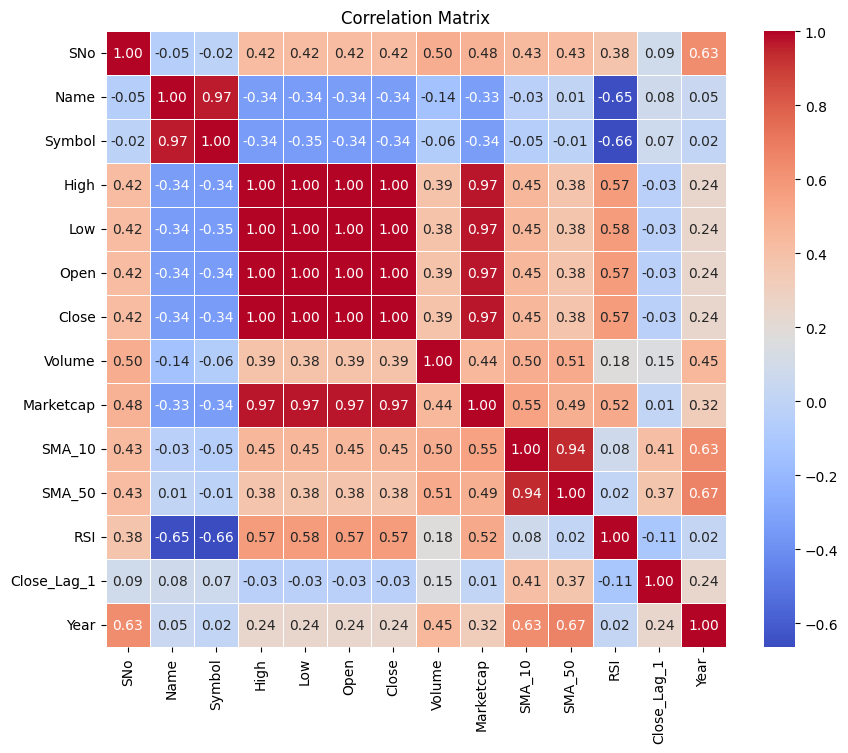

In [112]:

# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



This code snippet calculates the correlation coefficients between the `'Close'` column and all other columns in the `data` DataFrame. It does this by first calculating the correlation matrix of the entire DataFrame and then iterating through the columns of the correlation matrix to extract the correlation coefficients between `'Close'` and each other column. The correlation coefficients are then formatted and printed to the console.

In [64]:
# Correlation matrix
correlation_matrix = data.corr()

# Iterate through the columns and print the correlation coefficients with 'Close'
for column in correlation_matrix.columns:
    correlation_coefficient = correlation_matrix['Close'][column]
    print(f"Correlation between Close and {column}: {correlation_coefficient:.2f}")


Correlation between Close and SNo: 0.42
Correlation between Close and Name: -0.34
Correlation between Close and Symbol: -0.34
Correlation between Close and High: 1.00
Correlation between Close and Low: 1.00
Correlation between Close and Open: 1.00
Correlation between Close and Close: 1.00
Correlation between Close and Volume: 0.39
Correlation between Close and Marketcap: 0.97
Correlation between Close and SMA_10: 0.45
Correlation between Close and SMA_50: 0.38
Correlation between Close and RSI: 0.57
Correlation between Close and Close_Lag_1: -0.03
Correlation between Close and Year: 0.24



A bar plot to visualize the correlation coefficients between the `'Close'` column and all other columns in the `data` DataFrame. The correlations are extracted from the correlation matrix, sorted in descending order, and plotted using a bar chart. The plot is then titled, labeled, and displayed with rotated x-axis labels for better readability.

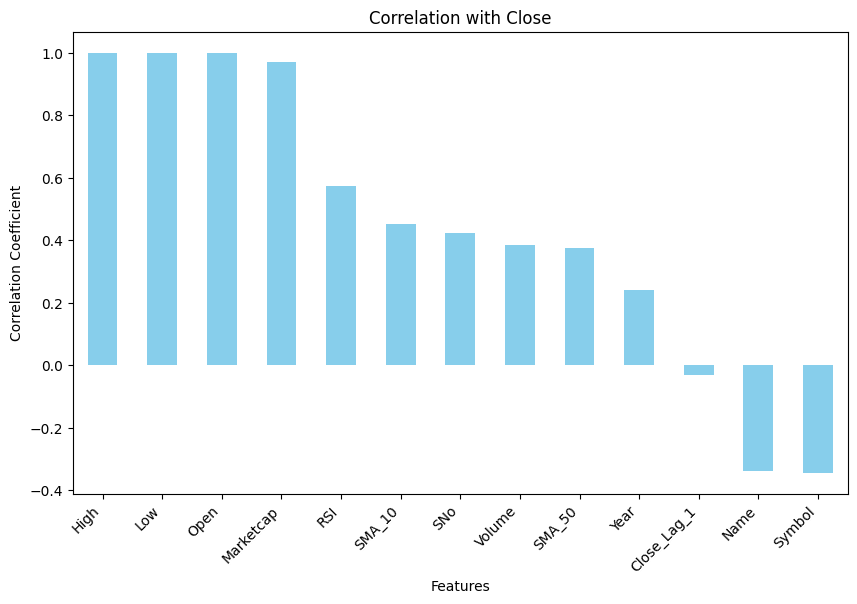

In [66]:
import matplotlib.pyplot as plt

# Extract correlations with 'Close' and sort them
correlations = correlation_matrix['Close'].sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
correlations.drop('Close').plot(kind='bar', color='skyblue')
plt.title('Correlation with Close')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()


The code below does the following;


**Feature Selection:** It selects the top 12 features based on their correlation with the target variable ('Close').

**Data Preparation:** It separates the selected features (X) and the target variable ('Close') (y).

**Normalization:** It scales the selected features using StandardScaler, which standardizes the feature values by removing the mean and scaling to unit variance. This step is important for models sensitive to the scale of input features, ensuring each feature contributes equally.

**Train-Test Split:** It splits the dataset into training and testing sets (80% for training and 20% for testing) to evaluate the model's performance on unseen data.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
top_features = correlations.nlargest(12).index

# Use only the top features
X = data[top_features]
y = data[target_column]

# Normalize only the features using StandardScaler before splitting
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




**Data Preparation:** Assumes data (X_train, X_test, y_train, y_test) is prepared and split.

**Sequence Creation:** Defines a function (create_sequences) to create input sequences and corresponding target labels for the GRU model. It uses a sliding window approach.

**Window Size and Reshaping:** Sets a window size of 12 and reshapes the input sequences to have three dimensions (samples, time steps, features).

**Model Architecture:** Defines a GRU model using the Keras functional API with a specified window size and a GRU layer with 50 units and 'relu' activation. It has an output layer with one neuron.

**Model Compilation:** Compiles the model using the Adam optimizer and Mean Squared Error (MSE) loss.

**Model Training:** Trains the model on the training sequences (X_train_seq_reshaped, y_train_seq) for 50 epochs, with a batch size of 32 and a validation split of 20%.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense
from sklearn.metrics import mean_absolute_error

# Assuming your data is already prepared and split (X_train, X_test, y_train, y_test)

# Function to create sequences for the GRU model
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size]
        label = data[i+window_size]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Set the window size
window_size = 12

# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(X_train, window_size)

# Create sequences for testing data
X_test_seq, y_test_seq = create_sequences(X_test, window_size)

# Reshape the input sequences to have three dimensions
X_train_seq_reshaped = X_train_seq.reshape(X_train_seq.shape[0], window_size, -1)
X_test_seq_reshaped = X_test_seq.reshape(X_test_seq.shape[0], window_size, -1)

# Define the input layer
input_layer = Input(shape=(window_size, X_train_seq_reshaped.shape[2]))

# GRU layer with return_sequences=True
gru_layer = GRU(50, activation='relu', return_sequences=True)(input_layer)

# Output layer
output_layer = Dense(1)(gru_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_seq_reshaped, y_train_seq, epochs=50, batch_size=32, validation_split=0.2)




Epoch 1/50
236/236 [==============================] - 9s 19ms/step - loss: 1.0028 - val_loss: 1.1373
Epoch 2/50
236/236 [==============================] - 2s 8ms/step - loss: 0.9988 - val_loss: 1.1423
Epoch 3/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9992 - val_loss: 1.1356
Epoch 4/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9976 - val_loss: 1.1372
Epoch 5/50
236/236 [==============================] - 2s 8ms/step - loss: 0.9971 - val_loss: 1.1377
Epoch 6/50
236/236 [==============================] - 3s 12ms/step - loss: 0.9965 - val_loss: 1.1366
Epoch 7/50
236/236 [==============================] - 3s 13ms/step - loss: 0.9960 - val_loss: 1.1377
Epoch 8/50
236/236 [==============================] - 4s 18ms/step - loss: 0.9963 - val_loss: 1.1371
Epoch 9/50
236/236 [==============================] - 4s 16ms/step - loss: 0.9963 - val_loss: 1.1376
Epoch 10/50
236/236 [==============================] - 2s 7ms/step - loss: 0.9957 - val_loss: 1

**Flattening:** Flattens both the predicted values (y_pred) and the true labels (y_test_seq) to a 1-dimensional array. This is done to compare individual predictions with actual values.

**Evaluation Metrics:**Computes and prints two commonly used regression metrics - Mean Absolute Error (MAE) and Mean Squared Error (MSE) - to assess how well the model performs on the test data.

**Mean Absolute Error (MAE):** The average absolute differences between predicted and actual values. It measures the average magnitude of errors.

**Mean Squared Error (MSE):** The average of the squared differences between predicted and actual values. It amplifies larger errors.



These metrics provide insights into the accuracy and precision of the model's predictions on the unseen test data. The lower these values, the better the model's performance.








In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test_seq_reshaped)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test_seq = y_test_seq.flatten()

# Calculate and print mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


74/74 [==============================] - 1s 7ms/step
Mean Absolute Error (MAE): 0.665407406772073
Mean Squared Error (MSE): 0.9429580038494817


Accuracy Calculation: Computes and prints the accuracy using the accuracy_score function from sklearn.metrics. Accuracy is the ratio of correctly predicted instances to the total number of instances in the test set.

In [19]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test_seq_reshaped)

# Convert predictions to binary labels based on a threshold
threshold = 0.8
y_pred_binary = (y_pred > threshold).astype(int)

# Convert true labels to binary labels based on the same threshold
y_test_binary = (y_test_seq > threshold).astype(int)

# Flatten the binary labels if needed
y_test_binary = y_test_binary.flatten()
y_pred_binary = y_pred_binary.flatten()

# Calculate and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')


74/74 [==============================] - 0s 3ms/step
Accuracy: 0.840844671201814


In [20]:
pip install scikeras

**Model Definition:** The create_gru_model function defines a GRU model using the functional API of Keras. It takes parameters for window size (window_size) and GRU units (units).

**KerasRegressor Wrapper:** The GRU model is wrapped using KerasRegressor from scikeras.wrappers. This allows the Keras model to be used as a regressor in the scikit-learn pipeline.

**Parameter Grid:** param_grid defines a grid of hyperparameters to search over. In this case, it includes different values for window_size and units.

**Time Series Cross-Validation:** The TimeSeriesSplit is employed as the cross-validation strategy. It ensures that training and validation sets are sequentially ordered in time to prevent data leakage.

**Grid Search CV:** GridSearchCV is utilized to perform the grid search over the hyperparameter space. The negative mean squared error ('neg_mean_squared_error') is chosen as the scoring metric.

**Fit and Results:** The model is fitted on the training sequences (X_train_seq_reshaped, y_train_seq), and the best hyperparameters and corresponding mean squared error (MSE) are printed.

This grid search helps identify the combination of hyperparameters that yields the best performance for the GRU model on the given time series data.

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# Function to create the GRU model using the functional API
def create_gru_model(window_size=12, units=50):
    input_layer = Input(shape=(window_size, X_train_seq_reshaped.shape[2]))
    gru_layer = GRU(units, activation='relu', return_sequences=True)(input_layer)
    output_layer = Dense(1)(gru_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model using KerasRegressor
keras_regressor = KerasRegressor(build_fn=create_gru_model, epochs=50, units = 50, window_size = 12, batch_size=32, validation_split=0.2, verbose=0)

# Define parameter grid for grid search
param_grid = {
    'window_size': [12, 24],  # Add more hyperparameters if needed
    'units': [50, 100],  # Specify different values for units
    # Add more hyperparameters and their values
}

# Create TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV
grid_search_gru = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_result_gru = grid_search_gru.fit(X_train_seq_reshaped, y_train_seq)

# Print the best parameters and corresponding MSE
print("Best parameters found: ", grid_result_gru.best_params_)
print("Best MSE found: ", -grid_result_gru.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best parameters found:  {'units': 50, 'window_size': 12}
Best MSE found:  1.0744061670126668


**Test Set Predictions:** The model is used to make predictions on the test sequences (X_test_seq_reshaped).

**Mean Absolute Error (MAE) Calculation:** The mean absolute error is calculated between the predicted (y_pred) and true (y_test_seq) values.

**Accuracy Calculation:** If the task involves binary classification, the predictions are converted to binary labels based on a threshold (0.8 in this case). Then, the accuracy is calculated using scikit-learn's accuracy_score between the binary predictions (y_pred_binary) and true binary labels (y_test_binary).

In [22]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# Get the best model from the grid search
best_model = grid_result_gru.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_seq_reshaped)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test_seq = y_test_seq.flatten()

# Calculate and print mean absolute error (MAE)
mae = mean_absolute_error(y_test_seq, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Convert predictions to binary labels based on a threshold (adjust threshold if needed)
threshold = 0.8
y_pred_binary = (y_pred > threshold).astype(int)

# Convert true labels to binary labels (optional, depending on your task)
y_test_binary = (y_test_seq > threshold).astype(int)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')


Mean Absolute Error (MAE): 0.6620951680336021
Accuracy: 0.8407383786848073


Similar to the GRU model but here we are training with LSTM

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import mean_absolute_error

# Assuming your data is already prepared and split (X_train, X_test, y_train, y_test)

# Function to create sequences for the LSTM model
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        seq = data[i:i+window_size]
        label = data[i+window_size]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Set the window size
window_size = 12

# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(X_train, window_size)

# Create sequences for testing data
X_test_seq, y_test_seq = create_sequences(X_test, window_size)

# Reshape the input sequences to have three dimensions
X_train_seq_reshaped = X_train_seq.reshape(X_train_seq.shape[0], window_size, -1)
X_test_seq_reshaped = X_test_seq.reshape(X_test_seq.shape[0], window_size, -1)

# Define the input layer
input_layer = Input(shape=(window_size, X_train_seq_reshaped.shape[2]))

# LSTM layer with return_sequences=True
lstm_layer = LSTM(50, activation='relu', return_sequences=True)(input_layer)

# Output layer
output_layer = Dense(1)(lstm_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_seq_reshaped, y_train_seq, epochs=50, batch_size=32, validation_split=0.2)




Epoch 1/50
236/236 [==============================] - 4s 11ms/step - loss: 1.0018 - val_loss: 1.1342
Epoch 2/50
236/236 [==============================] - 2s 10ms/step - loss: 0.9984 - val_loss: 1.1365
Epoch 3/50
236/236 [==============================] - 2s 10ms/step - loss: 0.9975 - val_loss: 1.1378
Epoch 4/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9973 - val_loss: 1.1362
Epoch 5/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9968 - val_loss: 1.1347
Epoch 6/50
236/236 [==============================] - 2s 7ms/step - loss: 0.9962 - val_loss: 1.1348
Epoch 7/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9959 - val_loss: 1.1350
Epoch 8/50
236/236 [==============================] - 2s 6ms/step - loss: 0.9963 - val_loss: 1.1358
Epoch 9/50
236/236 [==============================] - 1s 6ms/step - loss: 0.9958 - val_loss: 1.1354
Epoch 10/50
236/236 [==============================] - 2s 8ms/step - loss: 0.9949 - val_loss: 1.1

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Function to create the LSTM model
def create_lstm_model(window_size=12, units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', return_sequences=True, input_shape=(window_size, X_train_seq_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model using KerasRegressor
keras_regressor = KerasRegressor(build_fn=create_lstm_model, epochs=50, window_size = 12, units = 50, batch_size=32, validation_split=0.2, verbose=0)

# Define parameter grid for grid search
param_grid = {
    'window_size': [12, 24],
    'units': [50, 100],
    # Add more hyperparameters and their values
}

# Create TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_result_lstm = grid_search.fit(X_train_seq_reshaped, y_train_seq)

# Print the best parameters and corresponding MSE
print("Best parameters found: ", grid_result_lstm.best_params_)
print("Best MSE found: ", -grid_result_lstm.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best parameters found:  {'units': 50, 'window_size': 12}
Best MSE found:  1.0823652754126738


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test_seq_reshaped)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test_seq = y_test_seq.flatten()

# Calculate and print mean absolute error (MAE) and mean squared error (MSE)
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

74/74 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.6960917022624951
Mean Squared Error (MSE): 0.9640126844924137


In [26]:

# Make predictions on the test set
y_pred = model.predict(X_test_seq_reshaped)

# Convert predictions to binary labels based on a threshold
threshold = 0.8
y_pred_binary = (y_pred > threshold).astype(int)

# Convert true labels to binary labels based on the same threshold
y_test_binary = (y_test_seq > threshold).astype(int)

# Flatten the binary labels if needed
y_test_binary = y_test_binary.flatten()
y_pred_binary = y_pred_binary.flatten()

# Calculate and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')

74/74 [==============================] - 0s 3ms/step
Accuracy: 0.8388251133786848


Comparing the two models and picking the one with the lowest MAE/MSE and highest accuracy

In [27]:
# Assuming grid_result is the result of your GridSearchCV
best_gru_model = grid_result_gru.best_estimator_
y_pred_gru = best_gru_model.predict(X_test_seq_reshaped)
y_pred_gru = y_pred_gru.flatten()
y_test_seq_flatten = y_test_seq.flatten()
mae_gru = mean_absolute_error(y_test_seq_flatten, y_pred_gru)
accuracy_gru = accuracy_score((y_test_seq_flatten > 0.8).astype(int), (y_pred_gru > 0.8).astype(int))

# Assuming grid_result_lstm is the result of your LSTM GridSearchCV
best_lstm_model = grid_result_lstm.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test_seq_reshaped)
y_pred_lstm = y_pred_lstm.flatten()
mae_lstm = mean_absolute_error(y_test_seq_flatten, y_pred_lstm)
accuracy_lstm = accuracy_score((y_test_seq_flatten > 0.8).astype(int), (y_pred_lstm > 0.8).astype(int))

# Compare and Pick the Best Model
if mae_gru < mae_lstm:
    best_model = best_gru_model
    print("GRU Model has lower MAE. Choosing GRU Model.")
else:
    best_model = best_lstm_model
    print("LSTM Model has lower MAE.")

if accuracy_gru > accuracy_lstm:
    best_model = best_gru_model
    print("GRU Model has higher Accuracy. Choosing GRU Model.")
else:
    best_model = best_lstm_model
    print("LSTM Model has higher Accuracy. Choosing LSTM Model.")


GRU Model has lower MAE. Choosing GRU Model.
GRU Model has higher Accuracy. Choosing GRU Model.


Saving the model

In [29]:
import joblib
# Load the saved models
joblib.dump(best_model, '/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/best_gru_model.pkl')



['/content/drive/My Drive/Colab Notebooks/GROUP 15 _ FINAL PROJECT/best_gru_model.pkl']